In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [176]:
response_idx = 13
pid_idx = 21

In [177]:
pwd

'/Users/sayangul/Desktop/Research/MCRL/experiments/data/human/1.8'

In [178]:
cd ../1.8

/Users/sayangul/Desktop/Research/MCRL/experiments/data/human/1.8


In [179]:
df=pd.read_csv('survey-text.csv', sep=',',header=None)
df.values

array([['p_rdata', 'action_times', 'actions', ..., 'trial_type',
        'view_history', 'pid'],
       [nan, nan, nan, ..., 'survey-text', nan, '0'],
       [nan, nan, nan, ..., 'survey-text', nan, '1'],
       ..., 
       [nan, nan, nan, ..., 'survey-text', nan, '100'],
       [nan, nan, nan, ..., 'survey-text', nan, '101'],
       [nan, nan, nan, ..., 'survey-text', nan, '102']], dtype=object)

In [180]:
responses = df[response_idx]
responses

0                                             responses
1     {"Q0":"I tried to aviod the big decreases in m...
2     {"Q0":"Looked at end branch nodes for high val...
3     {"Q0":"I click on everything and see which one...
4     {"Q0":"I made my best route","Q1":"I tried to ...
5     {"Q0":"Guessing","Q1":"Not at all..","Q2":"29"...
6     {"Q0":"Choosing the potential for highest payi...
7     {"Q0":"Completely random. My decisions didn't ...
8               {"Q0":"","Q1":"","Q2":"26","Q3":"male"}
9     {"Q0":"IT WAS RANDOM","Q1":"NOT REALLY","Q2":"...
10    {"Q0":"I revealed most or all of the spots and...
11    {"Q0":"I tried to select the first route that ...
12    {"Q0":"I picked the ending spot with the highe...
13    {"Q0":"I calculated the best route that would ...
14    {"Q0":"I tried to maximize my profit by findin...
15    {"Q0":"I tried to minimize my cost and do my b...
16    {"Q0":"Checked which paid more","Q1":"no","Q2"...
17    {"Q0":"If the first point I looked at was 

In [181]:
responses = df[response_idx]
ages = []

for response in responses[1:]:
    elements = response.split('"')
    if elements[11] == 'Q2':
        age = elements[13]
    else:
        age = elements[11]
    if age == '':
        continue
    age = int(age)
    ages.append(age)

np.sort(ages)

array([18, 18, 21, 21, 22, 22, 22, 23, 24, 25, 25, 26, 26, 26, 26, 26, 26,
       26, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31,
       32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 37,
       37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40, 40, 41, 41,
       42, 42, 42, 43, 43, 43, 43, 45, 46, 46, 47, 47, 47, 48, 48, 50, 54,
       54, 55, 57, 61, 63])

(array([ 2.,  0.,  0.,  2.,  3.,  1.,  1.,  2.,  7.,  0.,  6.,  3.,  6.,
         1.,  5.,  4.,  3.,  2.,  2.,  2.,  5.,  7.,  2.,  2.,  3.,  4.,
         0.,  1.,  2.,  3.,  2.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.]),
 array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 45 Patch objects>)

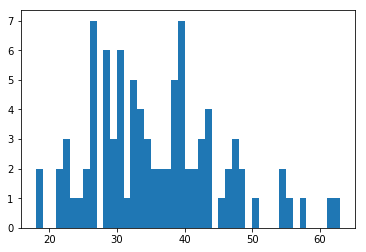

In [150]:
plt.figure()
plt.hist(ages, bins=np.arange(np.min(ages), np.max(ages)+1))

In [151]:
df[pid_idx]

0     pid
1       0
2       1
3       2
4       3
5       4
6       5
7       6
8       7
9       8
10      9
11     10
12     11
13     12
14     14
15     15
16     17
17     18
18     21
19     22
20     23
21     24
22     25
23     26
24     28
25     29
26     30
27     31
28     32
29     33
     ... 
61     70
62     71
63     72
64     73
65     74
66     75
67     76
68     77
69     78
70     79
71     80
72     81
73     82
74     83
75     84
76     85
77     86
78     87
79     88
80     89
81     90
82     91
83     92
84     95
85     97
86     98
87     99
88    100
89    101
90    102
Name: 21, Length: 91, dtype: object

In [154]:
responses0 = df[response_idx]
strategies = []
pids = []
# Grabs the text responses to the question "What was your planning strategy?"
for i in np.arange(responses0.size - 1):
    response = responses0[i+1]
    pid = int(df[pid_idx][i+1])
    pids.append(pid)
    elements = response.split('","')
    text = elements[0][7:]
    strategies.append(text)

strat = pd.DataFrame(pids, columns=['pid'])
strat['Verbal Report'] = strategies
strat

,pid,Verbal Report
0,0,I tried to aviod the big decreases in money.
1,1,Looked at end branch nodes for high value. I t...
2,2,I click on everything and see which one is the...
3,3,I made my best route
4,4,Guessing
5,5,Choosing the potential for highest paying rout...
6,6,Completely random. My decisions didn't have an...
7,7,
8,8,IT WAS RANDOM
9,9,I revealed most or all of the spots and tried ...


In [155]:
trialsdf=pd.read_csv('trials.csv', sep=',')
trialsdf = trialsdf[['pid','info_cost','score']]
trialsdf

,pid,info_cost,score
0,0,1.25,10.75
1,0,1.25,0.25
2,0,1.25,13.75
3,0,1.25,-1.00
4,0,1.25,20.00
5,0,1.25,16.25
6,0,1.25,8.25
7,0,1.25,-6.50
8,0,1.25,10.75
9,0,1.25,-15.75


In [156]:
means = trialsdf.groupby('pid').mean()
means.reset_index(level=0, inplace=True)
means['cat_score'] = np.zeros(means.shape[0],dtype=int)
means['cat_cost'] = np.zeros(means.shape[0],dtype=int)

In [157]:
means

,pid,info_cost,score,cat_score,cat_cost
0,0,1.25,7.484375,0,0
1,1,4.00,-7.000000,0,0
2,2,0.10,7.312500,0,0
3,3,0.10,2.500000,0,0
4,4,4.00,0.000000,0,0
5,5,1.25,3.593750,0,0
6,6,4.00,-2.500000,0,0
7,7,0.10,-6.500000,0,0
8,8,4.00,-2.000000,0,0
9,9,0.10,19.462500,0,0


In [167]:
costs = np.array([0.10000000000000002,1.25,4])
cost_str = ["low","med","high"]
for i in range(3):
    cost = costs[i]
    means.loc[means['info_cost'] == cost,'cat_score'] = pd.qcut(means[means['info_cost'] == cost]['score'],3,["low","med","high"])
    means.loc[means['info_cost'] == cost,'cat_cost'] = cost_str[i]

In [168]:
means

,pid,info_cost,score,cat_score,cat_cost
0,0,1.25,7.484375,high,med
1,1,4.00,-7.000000,low,high
2,2,0.10,7.312500,low,low
3,3,0.10,2.500000,low,low
4,4,4.00,0.000000,high,high
5,5,1.25,3.593750,med,med
6,6,4.00,-2.500000,med,high
7,7,0.10,-6.500000,low,low
8,8,4.00,-2.000000,high,high
9,9,0.10,19.462500,med,low


In [169]:
means_cat = means[['pid','cat_score','cat_cost']]

In [170]:
means_cat

,pid,cat_score,cat_cost
0,0,high,med
1,1,low,high
2,2,low,low
3,3,low,low
4,4,high,high
5,5,med,med
6,6,med,high
7,7,low,low
8,8,high,high
9,9,med,low


In [171]:
final = strat.merge(means_cat,on='pid')

In [172]:
final = pd.get_dummies(final,columns=['cat_score','cat_cost'])

In [173]:
final

,pid,Verbal Report,cat_score_high,cat_score_low,cat_score_med,cat_cost_high,cat_cost_low,cat_cost_med
0,0,I tried to aviod the big decreases in money.,1,0,0,0,0,1
1,1,Looked at end branch nodes for high value. I t...,0,1,0,1,0,0
2,2,I click on everything and see which one is the...,0,1,0,0,1,0
3,3,I made my best route,0,1,0,0,1,0
4,4,Guessing,1,0,0,1,0,0
5,5,Choosing the potential for highest paying rout...,0,0,1,0,0,1
6,6,Completely random. My decisions didn't have an...,0,0,1,1,0,0
7,7,,0,1,0,0,1,0
8,8,IT WAS RANDOM,1,0,0,1,0,0
9,9,I revealed most or all of the spots and tried ...,0,0,1,0,1,0


In [174]:
final.to_csv(path_or_buf='final.csv', sep="\t",index=False)